In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\umara\AppData\Local\Temp\ipykernel_8660\395453938.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
popdata = pd.read_csv('population.csv')
print(popdata)

    Year  Indiapop  category
0   1970        34         0
1   1975        59         0
2   1980        56         0
3   1985       130         1
4   1990        73         1
5   1995        83         1
6   2000        85         1
7   2005        45         0
8   2010       109         1
9   2015        23         0
10  2020        35         0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [12]:
X= popdata[['Year','category']].to_numpy()
y = popdata['Indiapop'].to_numpy()
print(X)
print(y)

[[1970    0]
 [1975    0]
 [1980    0]
 [1985    1]
 [1990    1]
 [1995    1]
 [2000    1]
 [2005    0]
 [2010    1]
 [2015    0]
 [2020    0]]
[ 34  59  56 130  73  83  85  45 109  23  35]


In [35]:
X=np.array(X).reshape(-1,1)
X

array([[ 34],
       [ 45],
       [ 56],
       [ 64],
       [ 73],
       [ 83],
       [ 85],
       [ 95],
       [109],
       [114],
       [134]], dtype=int64)

In [13]:
C=1.0
svc = svm.SVC(kernel = 'linear', C = C).fit(X, y)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C=1). fit(X, y)
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = 1). fit(X, y)

In [17]:
h=0.02
x_min, x_max = X[:,-1].min() - 1, X[:,-1].max() + 1
y_min, y_max = X[:,0].min() - 1, X[:,0].max() + 1
xx, yy = np.meshgrid (np.arange (x_min, x_max, h),np.arange(y_min, y_max))

In [18]:
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

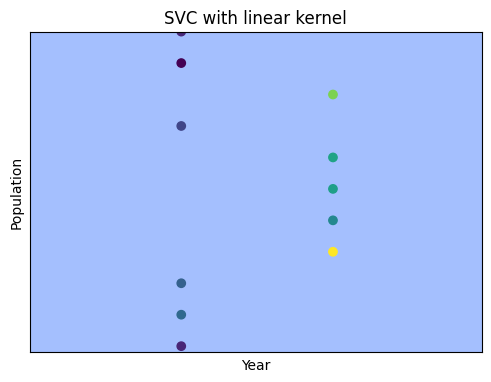

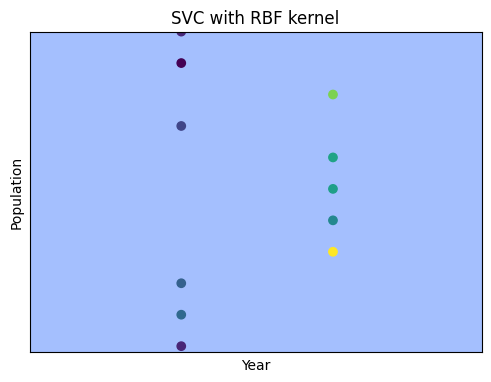

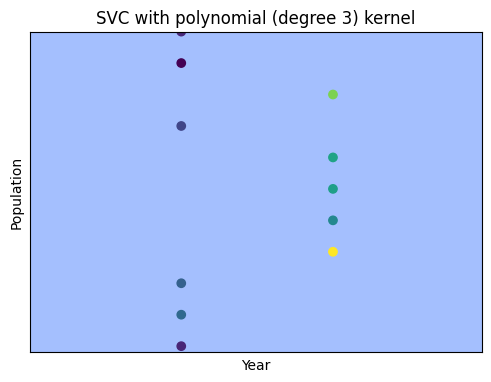

In [20]:
for i, clf in enumerate ((svc, rbf_svc, poly_svc)):
    plt.figure(figsize = (14, 10))
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    #plot also the traning points
    plt.scatter(X[:, -1], X[:, 0], c = y,cmap = plt.cm.coolwarm)   
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xlim(xx.min(), xx.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()